In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
# sns.set_context('notebook')
# sns.set_theme(style="ticks", color_codes=True)
# import torch
import torchaudio
import torchaudio.transforms as T
import librosa

/home/zizhao/miniconda3/envs/biocas/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_spectrogram(
    waveform,
    n_fft=400,
    win_len=None,
    hop_len=None,
    power=2.0,
):
    spectrogram = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_len,
        hop_length=hop_len,
        center=True,
        pad_mode="reflect",
        power=power,
    )
    return spectrogram(waveform)


def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [3]:
SAMPLE = 'clip/40138127_14.7_0_p3_139_0.wav'

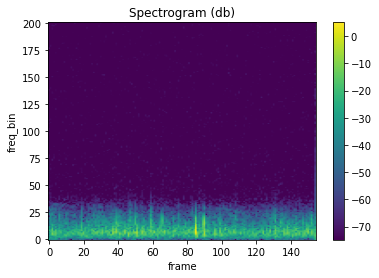

In [5]:
sample_wav, _ = torchaudio.load(SAMPLE)
plot_spectrogram(get_spectrogram(sample_wav)[0])